In [1]:
Pkg.add("PGFPlots")
Pkg.add("Iterators")
Pkg.add("BayesNets")
Pkg.add("LightGraphs")
Pkg.add("TikzGraphs")
Pkg.add("Discretizers")
Pkg.add("RDatasets")
Pkg.add("Plots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PGFPlots
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Iterators
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of BayesNets
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of LightGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of TikzGraphs
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Discretizers
INFO: Use `Pkg

In [2]:
using Iterators
using LightGraphs
using BayesNets
using PGFPlots
using TikzGraphs
using Discretizers
using RDatasets
using Plots

In [3]:
movieData = readtable("movie_metadata.csv")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,num_genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Randall Miller,1,34,19,362,Elden Henson,882,333658,Comedy|Family|Musical|Romance|Short,5,William Hurt,Marilyn Hotchkiss' Ballroom Dancing and Charm School,97,1967,Michael Bower,0,student film|wonder years,http://www.imdb.com/title/tt0283465/?ref_=fn_tt_tt_1,2,English,USA,NA,34000,1990,577,7.1,NA,16
2,Black and White,Harry F. Millarde,1,110,0,0,Johnnie Walker,2,3000000,Crime|Drama,2,Stephen Carr,Over the Hill to the Poorhouse,5,4,Mary Carr,1,family relationships|gang|idler|poorhouse|thief,http://www.imdb.com/title/tt0011549/?ref_=fn_tt_tt_1,1,NA,USA,NA,100000,1920,2,4.8,1.33,0
3,Color,Tom Sanchez,1,110,0,0,Antonio Arrué,3,3830,Comedy|Drama,2,Nataniel Sánchez,The Knife of Don Juan,27,5,Juan Carlos Montoya,3,NA,http://www.imdb.com/title/tt1349485/?ref_=fn_tt_tt_1,1,Spanish,USA,NA,1200000,2013,2,7.2,NA,75
4,Color,Timothy Hines,1,111,0,247,Kelly LeBrock,1000,14616,Drama,1,Christopher Lambert,10 Days in a Madhouse,314,2059,Alexandra Callas,1,NA,http://www.imdb.com/title/tt3453052/?ref_=fn_tt_tt_1,10,English,USA,R,12000000,2015,445,7.5,1.85,26000
5,Color,Jennifer Wynne Farmer,2,107,0,236,Akima,752,10508,Drama,1,Irene Bedard,Naturally Native,103,1763,Max Gail,4,cosmetics|female protagonist|native american|native american protagonist|sister sister relationship,http://www.imdb.com/title/tt0133117/?ref_=fn_tt_tt_1,6,English,USA,PG-13,700000,1998,282,6.5,NA,102
6,Color,Johnny Remo,2,112,74,891,Randy Wayne,260000,96734,Action|Drama,2,Matthew Ziff,Hardflip,606,263584,Raquel Elizabeth Ames,3,family relationships|loss of mother|san diego california|single mother|suicide attempt,http://www.imdb.com/title/tt1907639/?ref_=fn_tt_tt_1,5,English,USA,PG-13,1000000,2012,984,5.6,1.85,706
7,Color,Franklin J. Schaffner,2,118,76,249,William Hootkins,902,800000,Adventure|Mystery|Thriller,3,Frank Langella,Sphinx,892,2079,John Gielgud,0,bat|curse|egyptologist|mummy|murder,http://www.imdb.com/title/tt0083113/?ref_=fn_tt_tt_1,21,English,USA,PG,14000000,1981,488,5.2,2.35,106
8,Color,Mike Bruce,3,78,6,17,Kirpatrick Thomas,32,243768,Western,1,Joseph Campanella,The Legend of God's Gun,143,72,Christian Anderson,0,NA,http://www.imdb.com/title/tt1073221/?ref_=fn_tt_tt_1,9,English,USA,R,30000,2007,17,4.1,2.35,13
9,Color,Kurt Hale,3,101,0,17,Big Budah,69,1111615,Comedy|Crime|Family,3,Kirby Heyborne,The R.M.,651,155,Curt Doussett,0,latter day saints|missionary|pickup truck|police|video camera,http://www.imdb.com/title/tt0341540/?ref_=fn_tt_tt_1,34,English,USA,PG,500000,2003,34,6.0,NA,44
10,Color,U. Roberto Romano,3,80,6,NA,NA,NA,2245,Documentary,1,NA,The Harvest/La Cosecha,57,0,NA,0,child labor|education|hispanic|labor|migration,http://www.imdb.com/title/tt1981703/?ref_=fn_tt_tt_1,2,English,USA,NA,560000,2011,NA,7.2,NA,88


In [4]:
#variables:
#Gross (query variable)
#Budget (evidence/input variable)
#Genre (evidence/input variable)
#IMDB score (evidence/input variable)
#Number of critic reviews (evidence/input variable)
#Number of Movie facebook likes
#Total cast facebook likes
#Number of faces in movie poster
#Director facebook likes
#Content rating
#Duration
#Title year


In [30]:
#data discretization
nbinsLarge = 5
nbinsSmall = 3

gross_edges = binedges(DiscretizeUniformCount(nbinsLarge), movieData[:gross])
gross_discretizer = LinearDiscretizer(gross_edges);
budget_edges = binedges(DiscretizeUniformCount(nbinsLarge), movieData[:budget])
budget_discretizer = LinearDiscretizer(budget_edges);

imdbScore_edges = binedges(DiscretizeUniformCount(nbinsLarge), movieData[:imdb_score])
imdbScore_discretizer = LinearDiscretizer(imdbScore_edges);
critic_edges = binedges(DiscretizeUniformCount(nbinsLarge), movieData[:num_critic_for_reviews])
critic_discretizer = LinearDiscretizer(critic_edges);



In [31]:
dataUndiscretized = DataFrame(
    gross = movieData[:gross], #encode(gross_discretizer, movieData[:gross]),
    budget = movieData[:budget],#encode(budget_discretizer, movieData[:budget]),
    imdbScore = movieData[:imdb_score],#encode(imdbScore_discretizer, movieData[:imdb_score]),
    numCriticReviews = movieData[:num_critic_for_reviews],#encode(critic_discretizer, movieData[:num_critic_for_reviews]),
    numGenres = movieData[:num_genres],
)

dataDiscretized = DataFrame(
    gross = encode(gross_discretizer, movieData[:gross]),
    budget = encode(budget_discretizer, movieData[:budget]),
    imdbScore = encode(imdbScore_discretizer, movieData[:imdb_score]),
    numCriticReviews = encode(critic_discretizer, movieData[:num_critic_for_reviews]),
    numGenres = movieData[:num_genres],
)

#writetable("output.csv", data)
dataUndiscretized = dataUndiscretized[1:20,:]
display(dataUndiscretized)

#dataDiscretized = dataDiscretized[1:1000,:]
display(dataDiscretized)

,gross,budget,imdbScore,numCriticReviews,numGenres
1,333658,34000,7.1,1,5
2,3000000,100000,4.8,1,2
3,3830,1200000,7.2,1,2
4,14616,12000000,7.5,1,1
5,10508,700000,6.5,2,1
6,96734,1000000,5.6,2,2
7,800000,14000000,5.2,2,3
8,243768,30000,4.1,3,1
9,1111615,500000,6.0,3,3
10,2245,560000,7.2,3,1


,gross,budget,imdbScore,numCriticReviews,numGenres
1,1,1,4,1,5
2,1,1,1,1,2
3,1,1,5,1,2
4,1,2,5,1,1
5,1,1,3,1,1
6,1,1,2,1,2
7,1,2,1,1,3
8,1,1,1,1,1
9,1,1,2,1,3
10,1,1,5,1,1


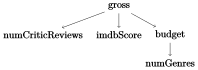

In [32]:
#structure learning
params = K2GraphSearch([:gross, :budget, :imdbScore, :numCriticReviews, :numGenres], 
                       CategoricalCPD{Categorical{Float64}},
                       max_n_parents=4)
bn = fit(BayesNet, dataDiscretized, params)

In [58]:
table = rand_table_weighted(bn; nsamples=300, consistent_with=Assignment(:imdbScore=>4, :numCriticReviews=>3))

,budget,gross,imdbScore,numCriticReviews,numGenres,p
1,5,5,4,3,3,0.0021622963338400612
2,4,5,4,3,1,0.0038239571284998633
3,3,1,4,3,2,0.004186573752754161
4,1,1,4,3,2,0.0024826043816871036
5,1,1,4,3,2,0.0024826043816871036
6,3,3,4,3,2,0.003896936574890665
7,5,5,4,3,4,0.0021622963338400612
8,1,1,4,3,3,0.0024826043816871036
9,4,5,4,3,1,0.0038239571284998633
10,2,1,4,3,5,0.003460900968943439


In [59]:
function likelihoodWeightedSampling(table, value)
    numerator = 0
    denominator = 0  
    for i = 1:length(table[:,1])
        row = table[i,:]
        if row[:gross][1] == value
            numerator = numerator + row[:p][1]
        end
        denominator = denominator + row[:p][1]
    end
    return numerator./denominator
end

likelihoodWeightedSampling (generic function with 1 method)

) in module Main at In[34]:2 overwritten at In[59]:2.


In [60]:
function getMostLikelyClass(table,numClasses)
    highestLikelihood = 0
    mostLikelyClass = -1
    for i = 1:numClasses
        likelihood = likelihoodWeightedSampling(table,i)
        display(likelihood)
        if likelihood > highestLikelihood
            highestLikelihood = likelihood
            mostLikelyClass = i
        end
    end
    return mostLikelyClass
end

getMostLikelyClass (generic function with 1 method)

 in module Main at In[56]:2 overwritten at In[60]:2.


In [61]:
getMostLikelyClass(table,5)

0.1656615528994072

0.18262881352951832

0.22118347166141447

0.21160525622742868

0.2189209056822312

3

In [ ]:
#structure learning
params2 = K2GraphSearch([:gross, :budget, :imdbScore, :numCriticReviews, :numGenres], 
                       ConditionalLinearGaussianCPD,
                       max_n_parents=2)
bn2 = fit(BayesNet, dataUndiscretized, params2)

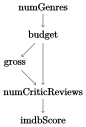

In [37]:
params = GreedyHillClimbing(ScoreComponentCache(dataDiscretized), max_n_parents=3, prior=UniformPrior())
bn = fit(DiscreteBayesNet, dataDiscretized, params)

In [40]:
bayesian_score(bn, dataDiscretized, params.prior)

-23569.52935290899